In [1]:
pwd

'/home/kuldeep/Downloads/Notes-AI-full/Campus-recruitmentML-task'

In [2]:
ls

'archive(1)'/      campus-recruitment.ipynb
'archive(1).zip'   Placement_Data_Full_Class.csv


In [3]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [4]:
data = pd.read_csv("Placement_Data_Full_Class.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Data source:https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement?resource=download

# About the Data

This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

Tasks

1. Which factor influenced a candidate in getting placed?
2. Does percentage matters for one to get placed?
3. Which degree specialization is much demanded by corporate?
4. Play with the data conducting all statistical tests.

# Data Preprocessing

In [11]:
data.shape

(215, 15)

The dataset has 215 rows and 15 columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Only the salary column has null values.

In [10]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [12]:
#Checking the number of unique values from the datatype "object"
data.select_dtypes(include='object').nunique()

gender            2
ssc_b             2
hsc_b             2
hsc_s             3
degree_t          3
workex            2
specialisation    2
status            2
dtype: int64

In [13]:
# we can easily drop sl_no column because its only identifier column
data.drop(columns='sl_no', inplace=True)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [15]:
data.shape

(215, 14)

# Let's do some Visualization

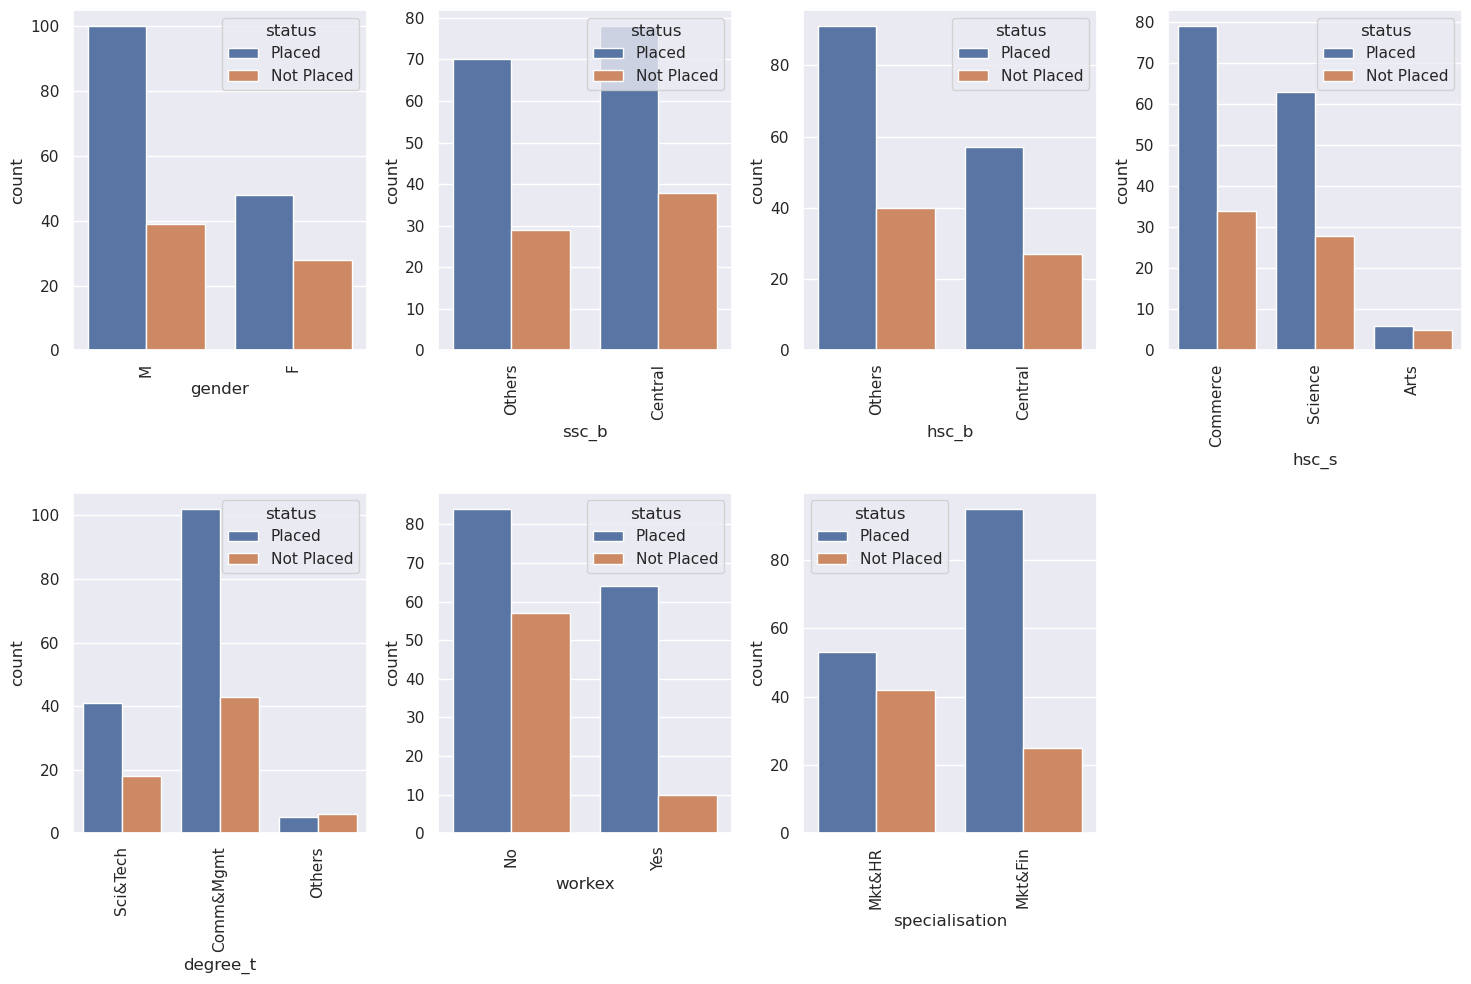

In [16]:
# list of categorical variables to plot
cat_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='status', data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# show plot
plt.show()

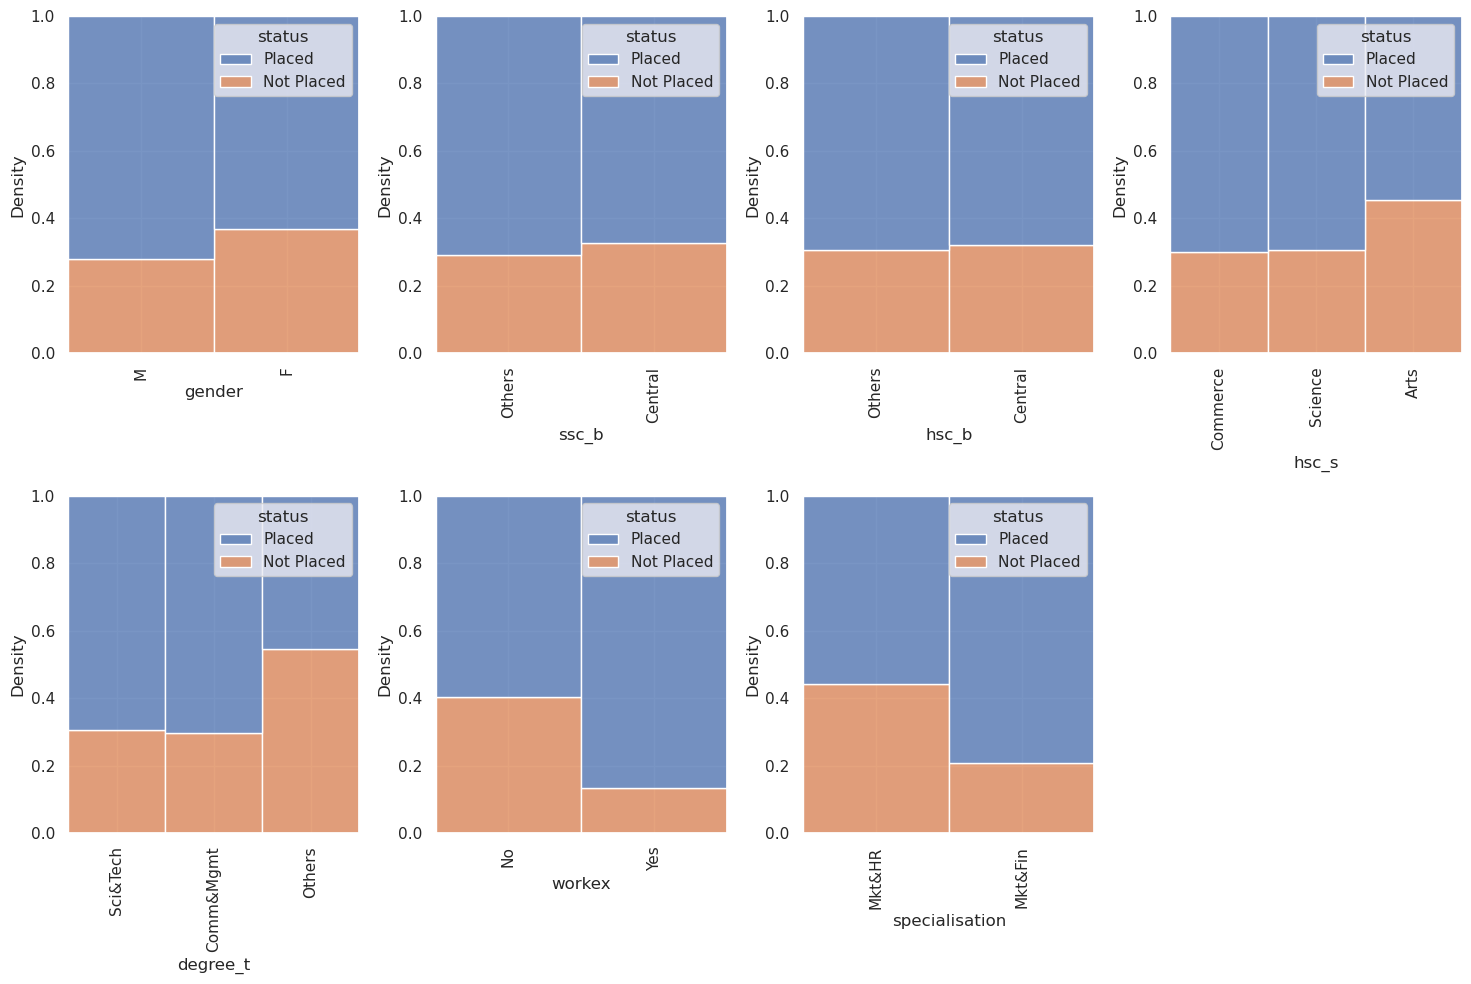

In [18]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='status', data=data, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(data[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# show plot
plt.show()

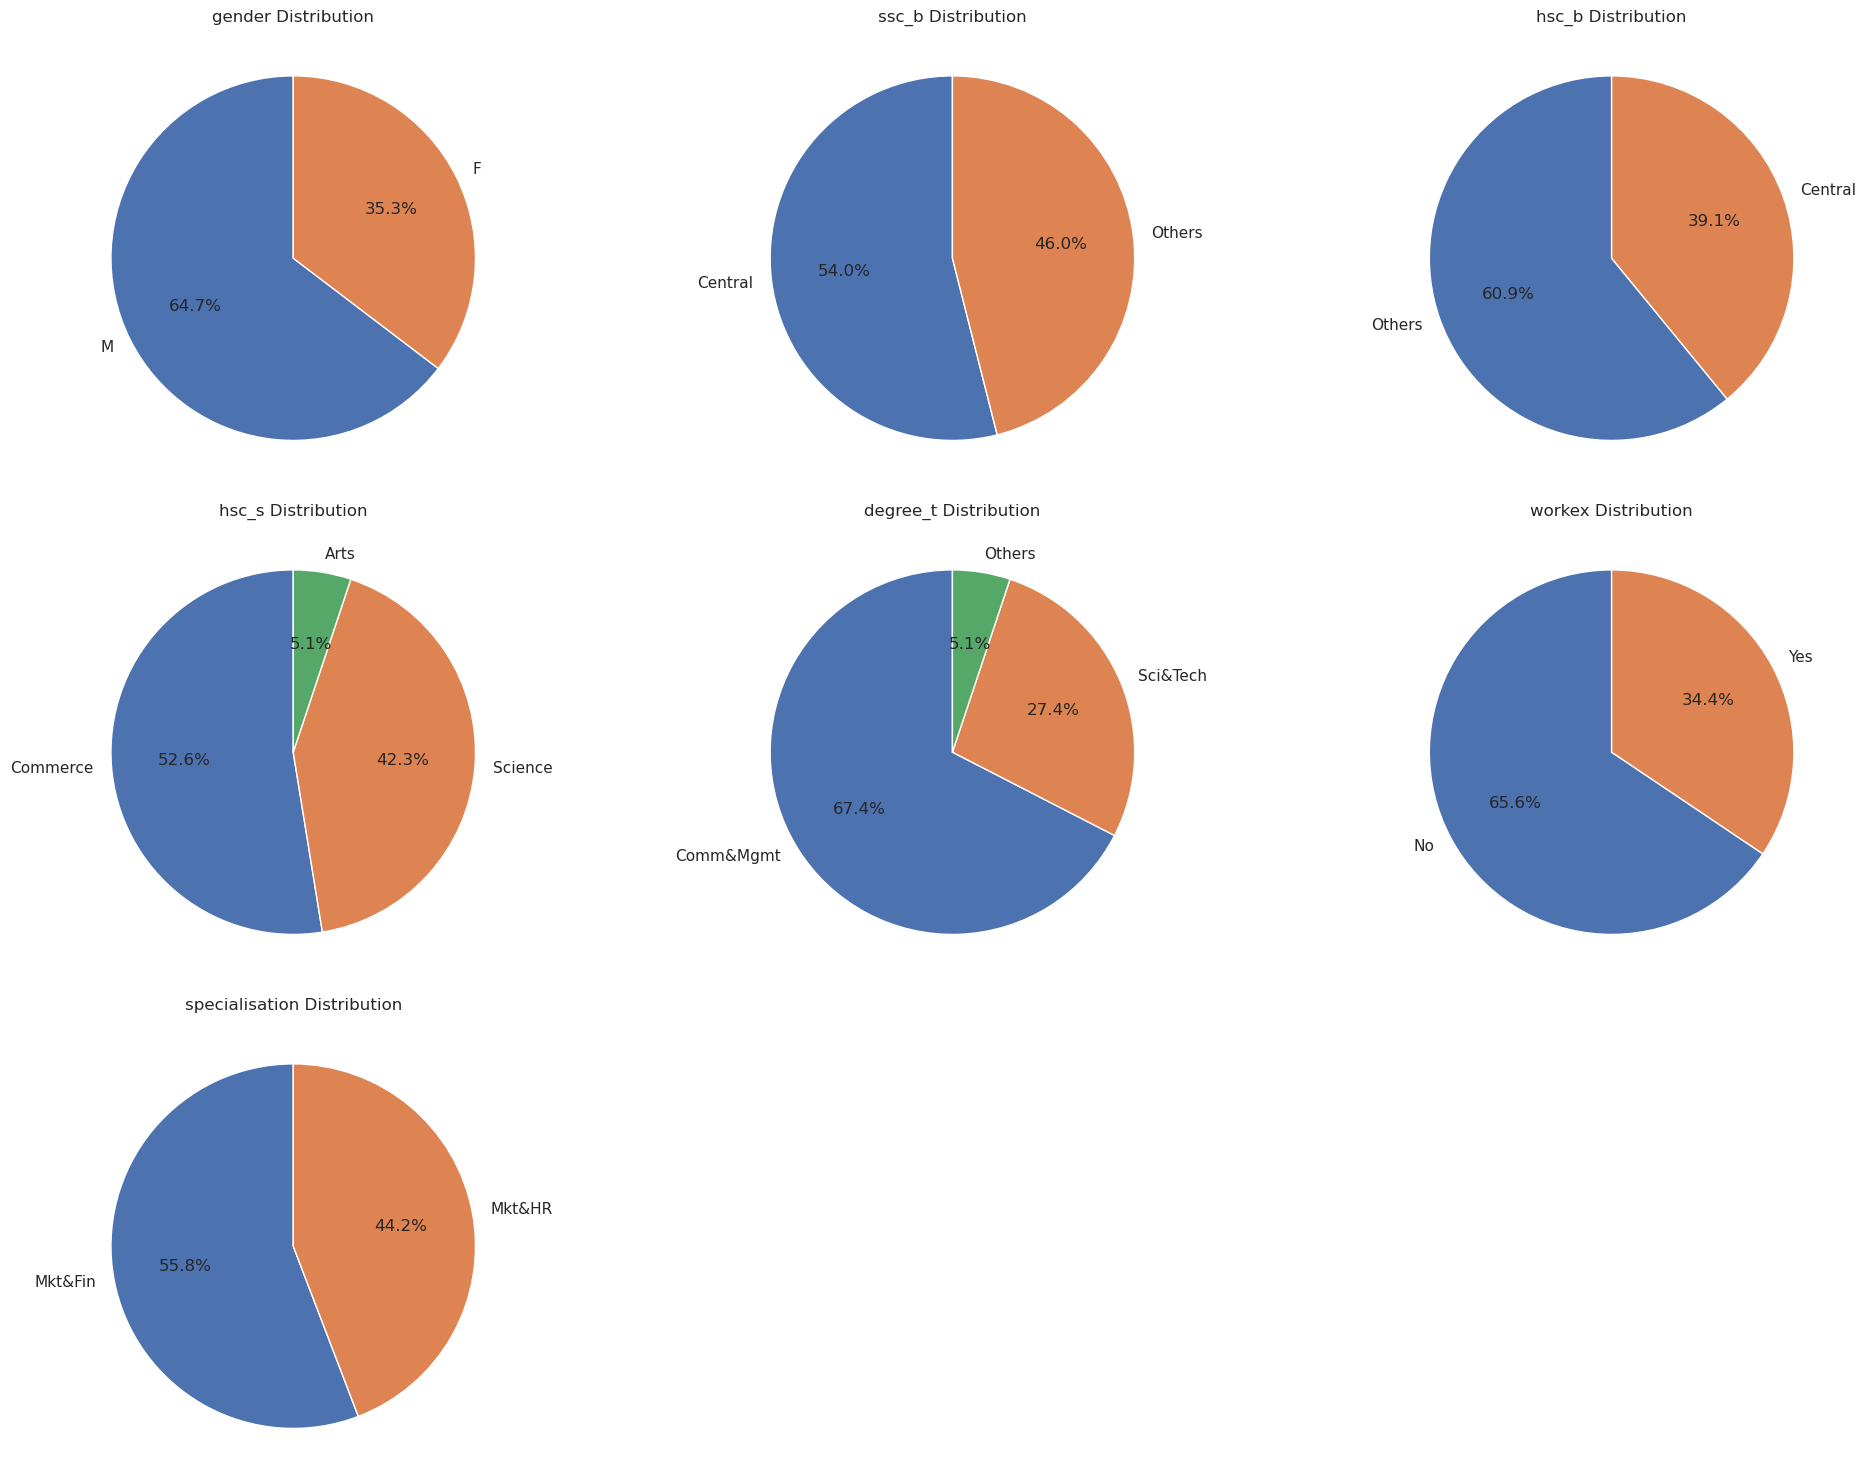

In [19]:
# create a figure and axes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = data[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# remove the eighth and ninth subplot
fig.delaxes(axs[2, 2])  # 2 represents the row index, and 2 represents the column index
fig.delaxes(axs[2, 1])  # 2 represents the row index, and 1 represents the column index

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

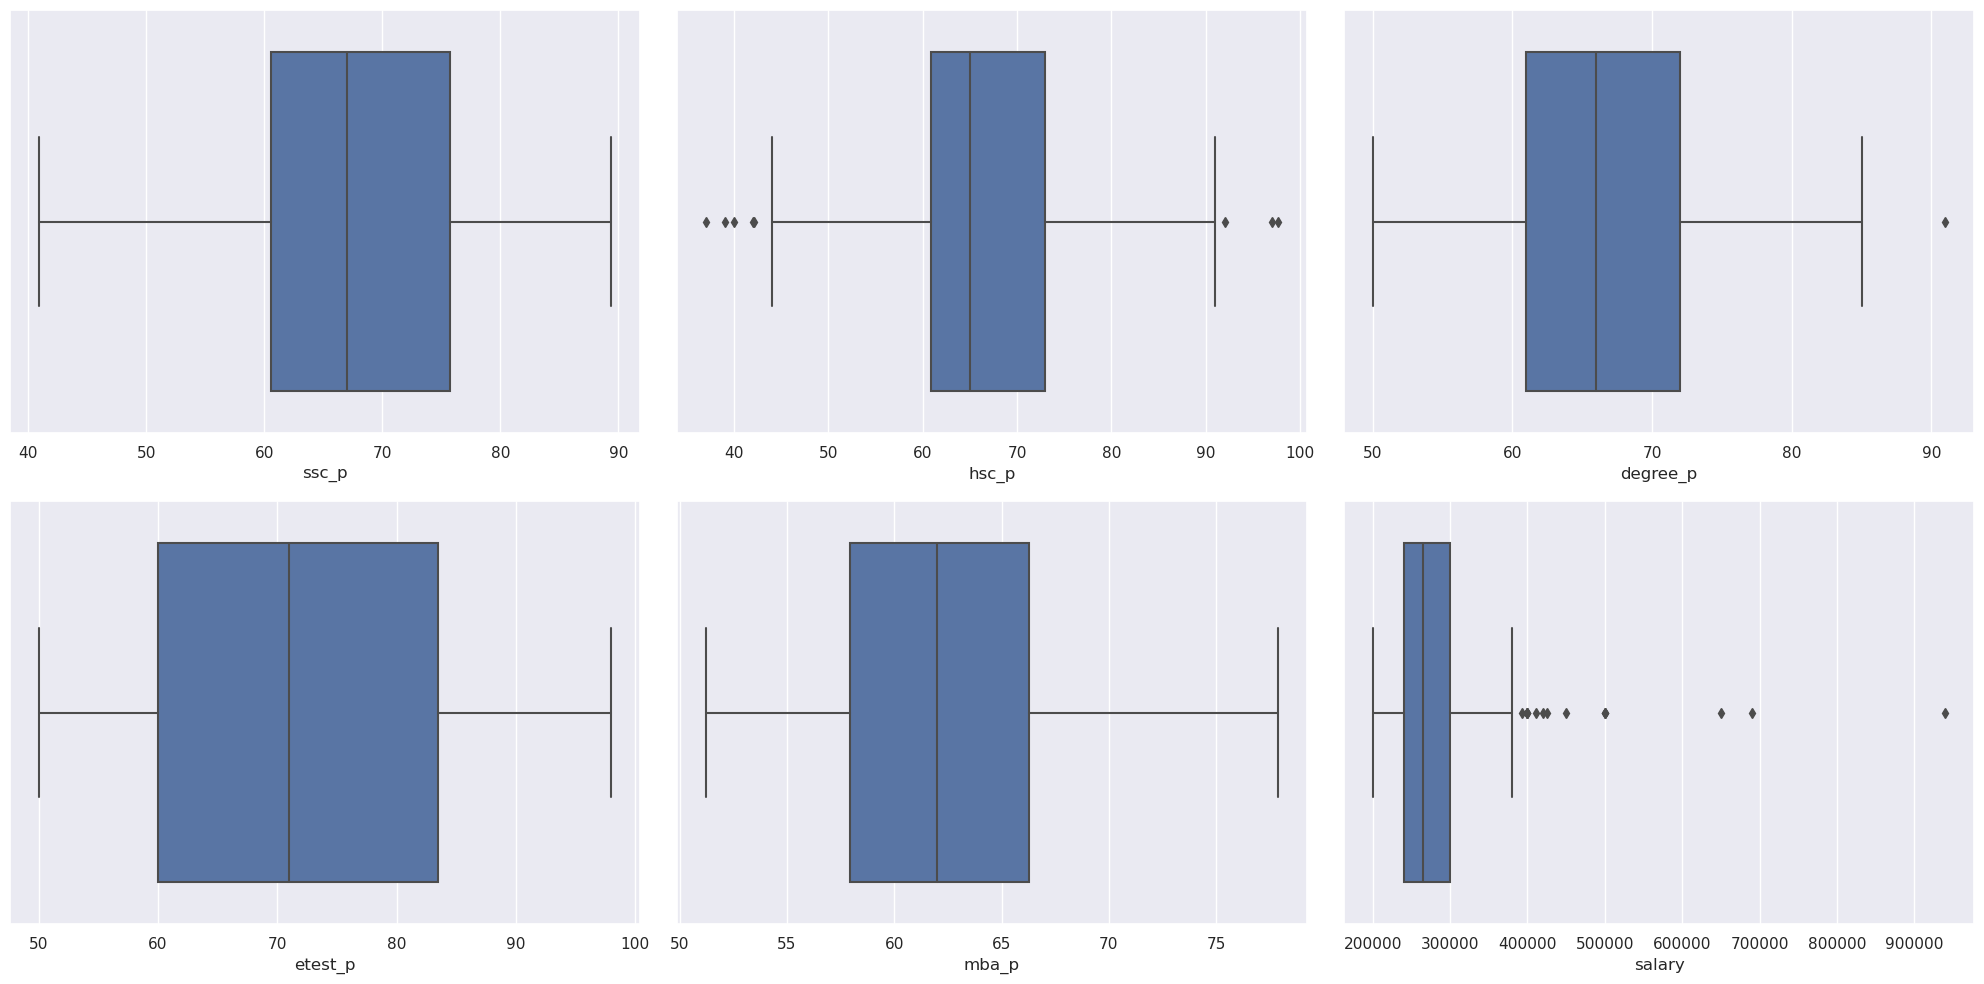

In [20]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 
            'mba_p','salary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=data, ax=axs[i])

fig.tight_layout()

plt.show()

we can see outliers in hsc_p, degree and salaray.

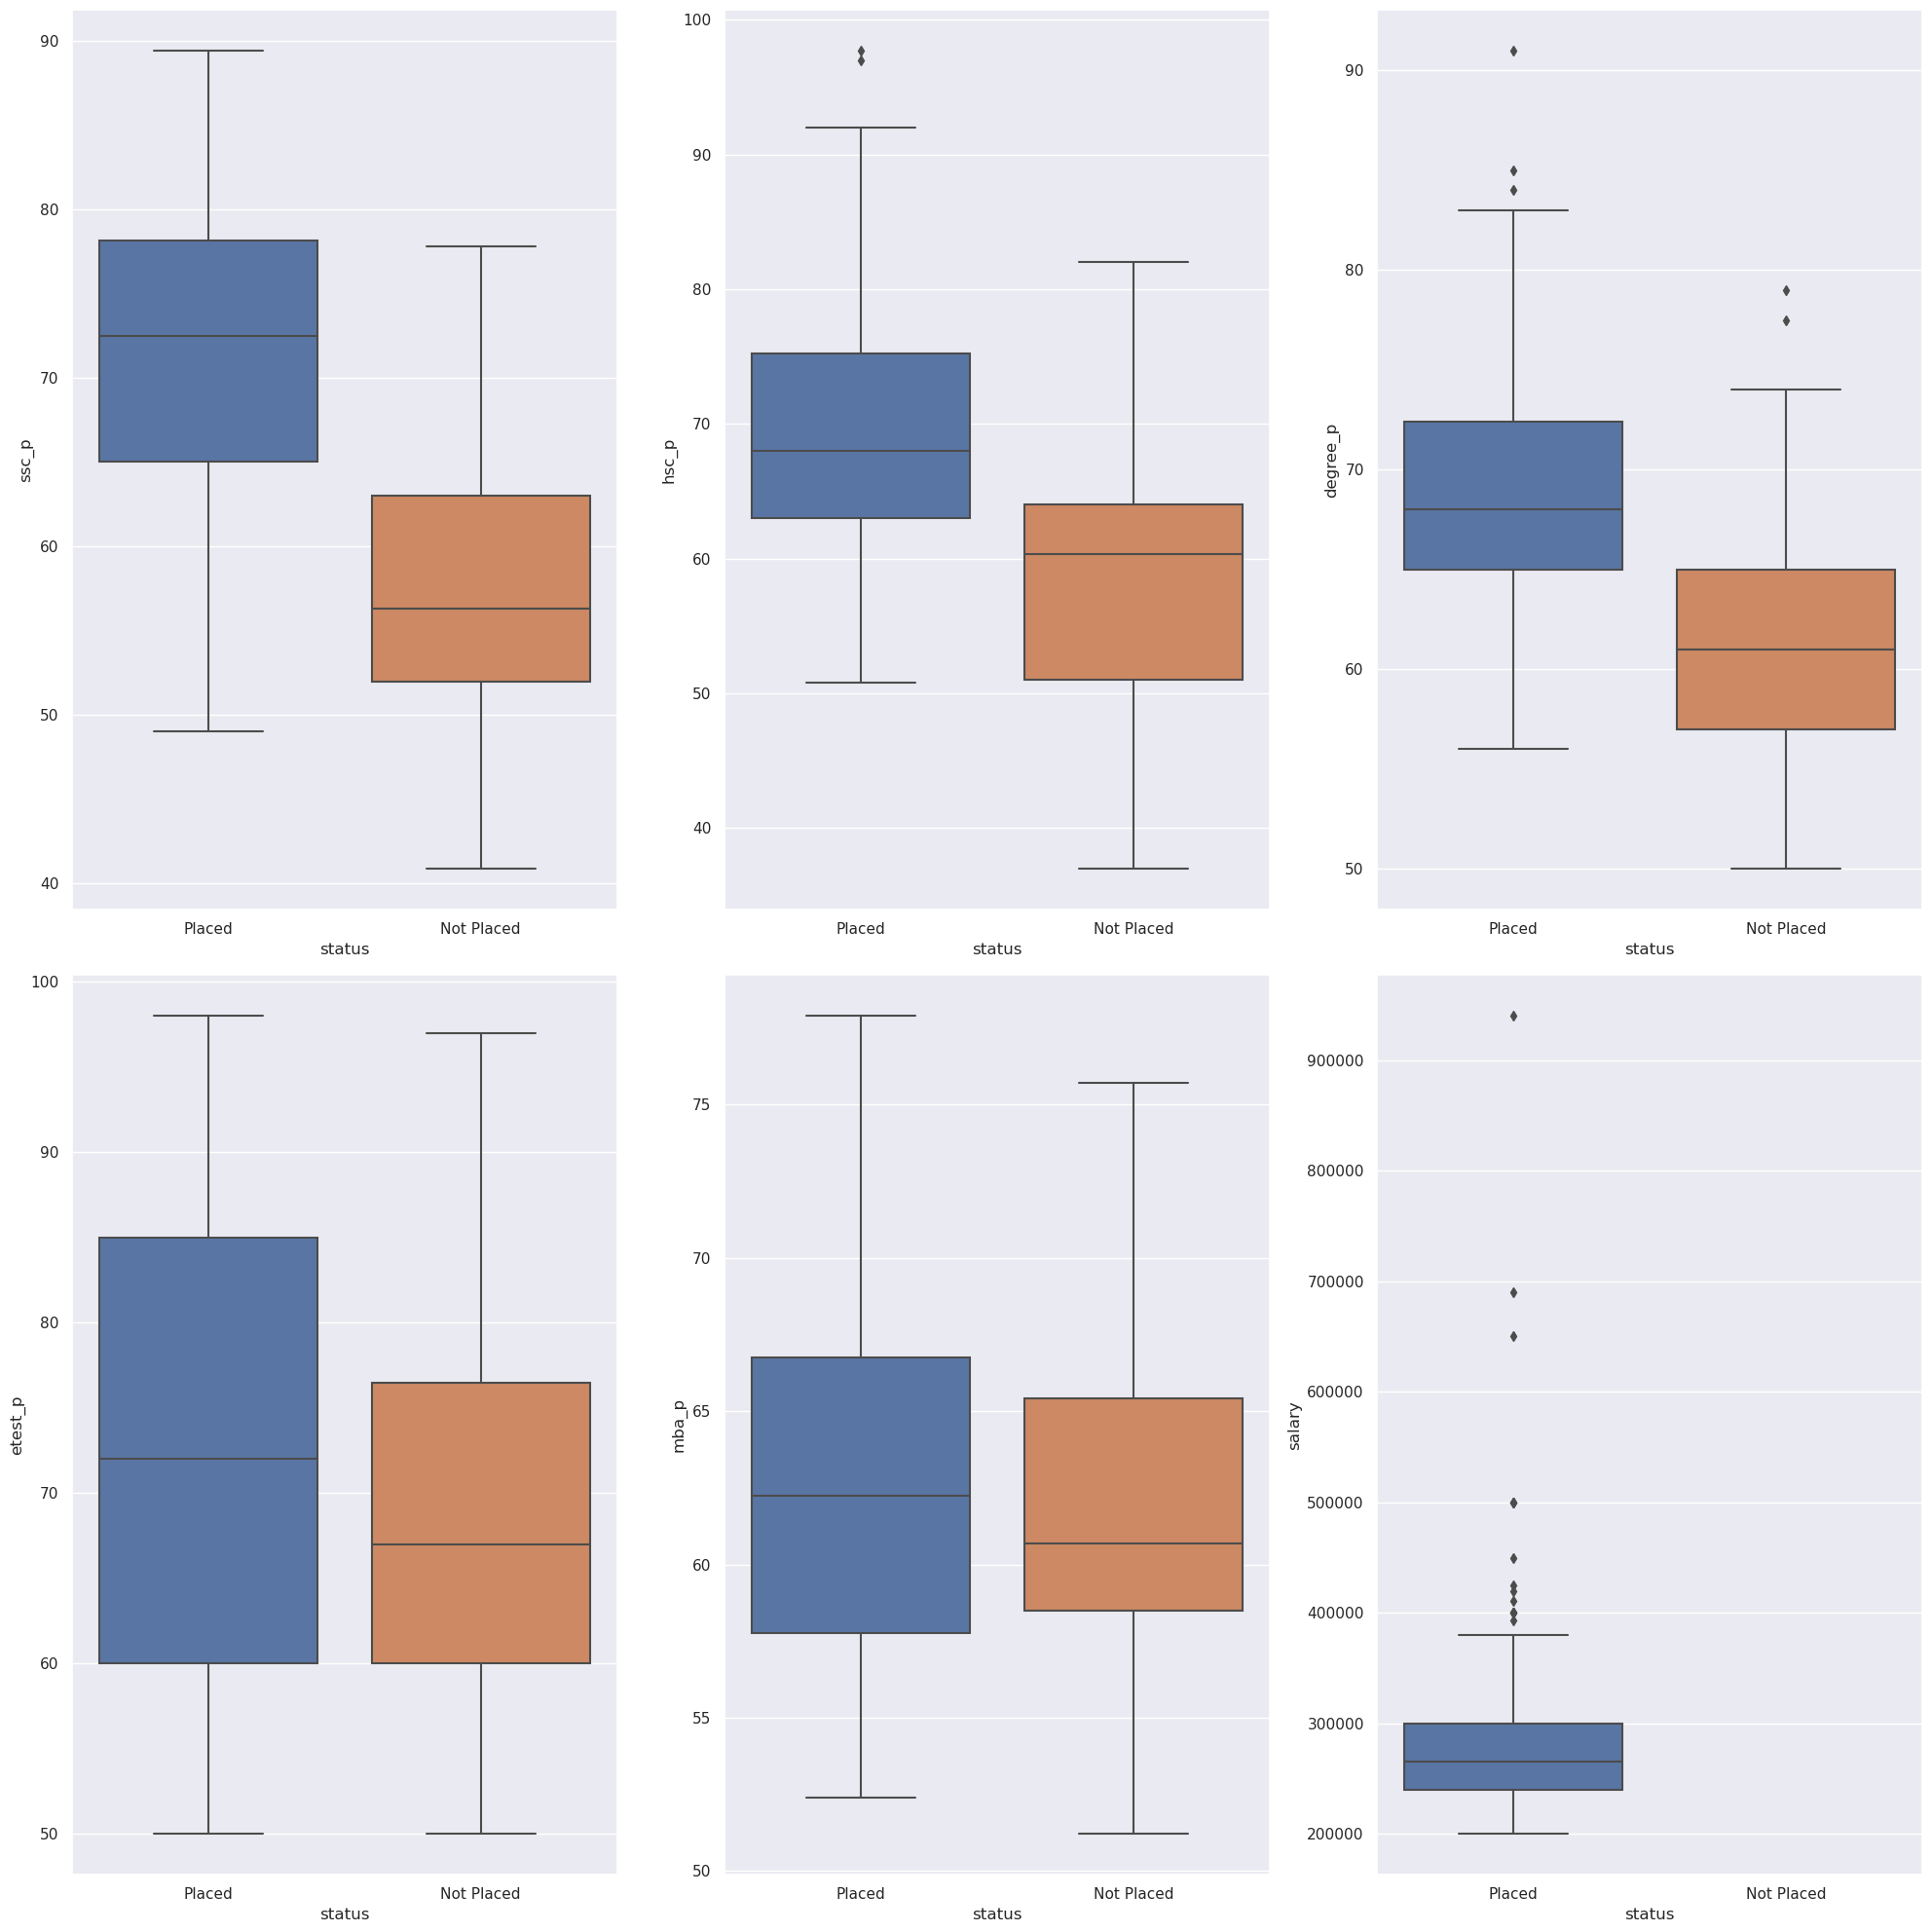

In [21]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 
            'mba_p','salary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='status', data=data, ax=axs[i])

fig.tight_layout()

plt.show()

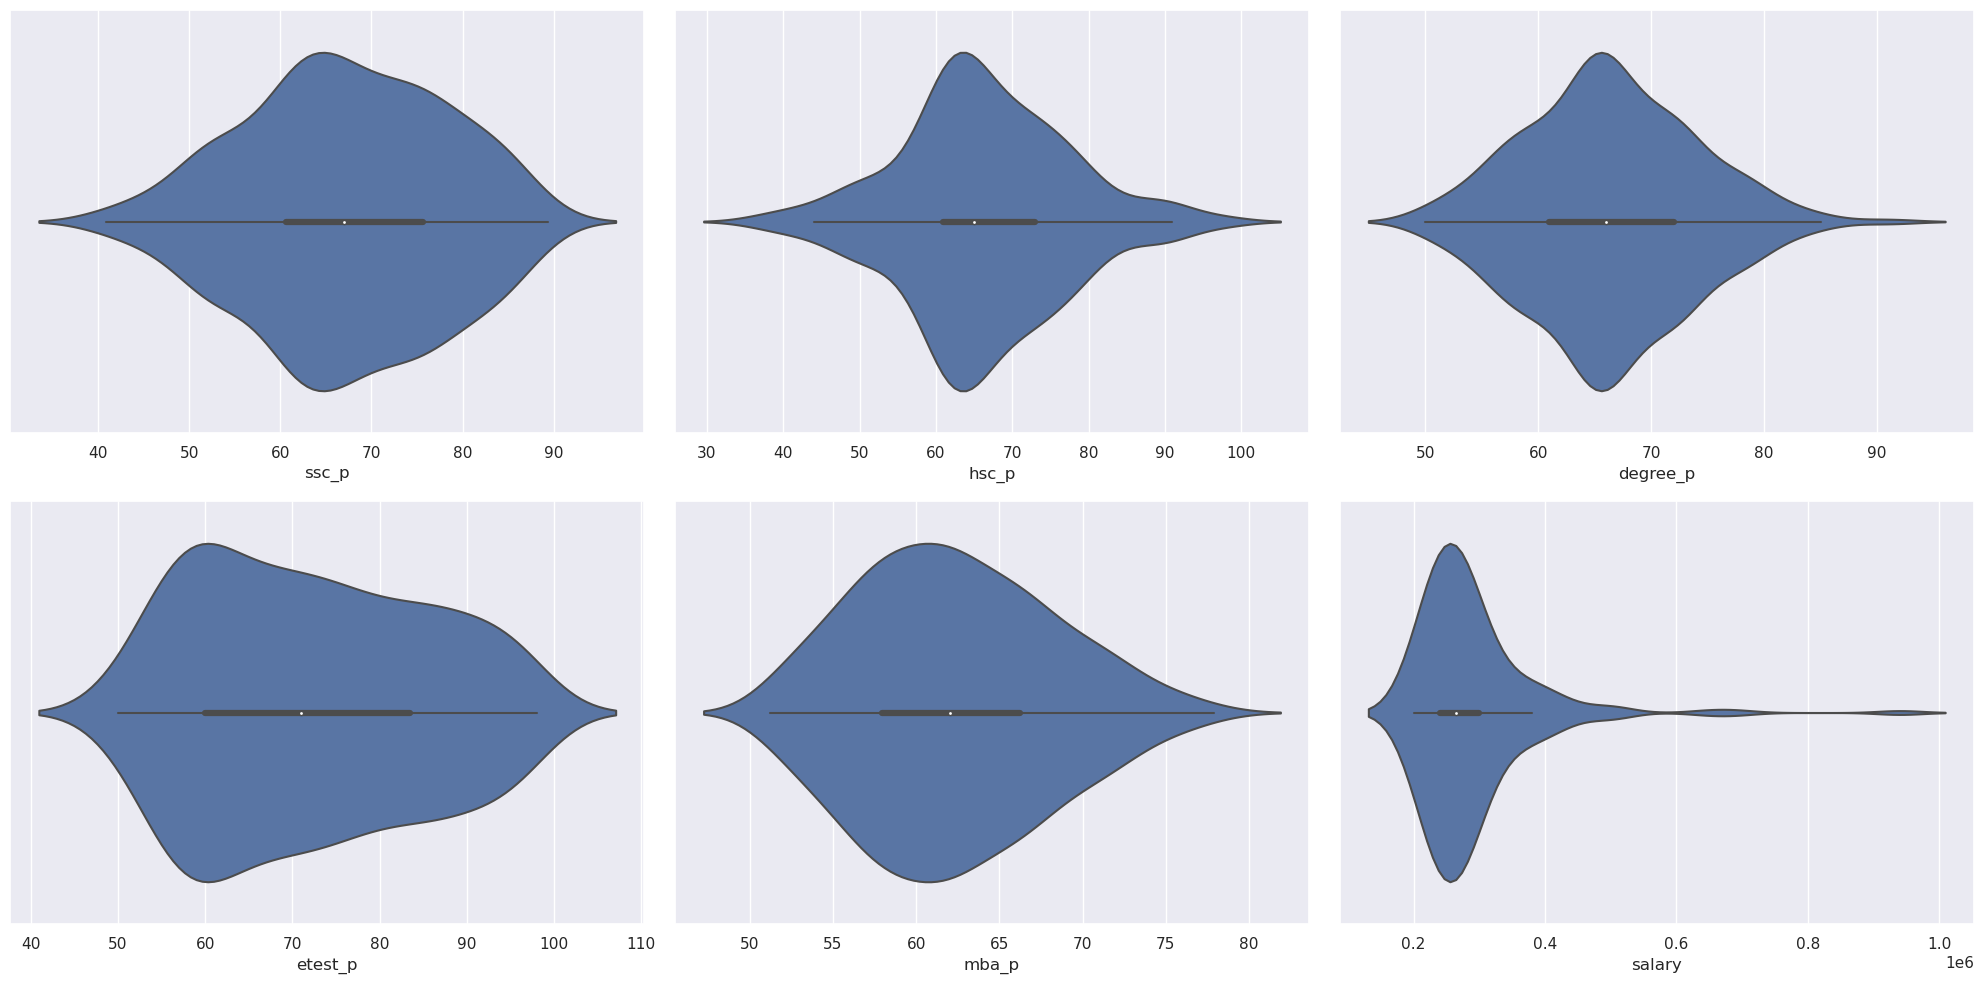

In [22]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 
            'mba_p','salary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=data, ax=axs[i])

fig.tight_layout()

plt.show()

We can see that the salary features contains missing values and most of the data points are centered towards the median.

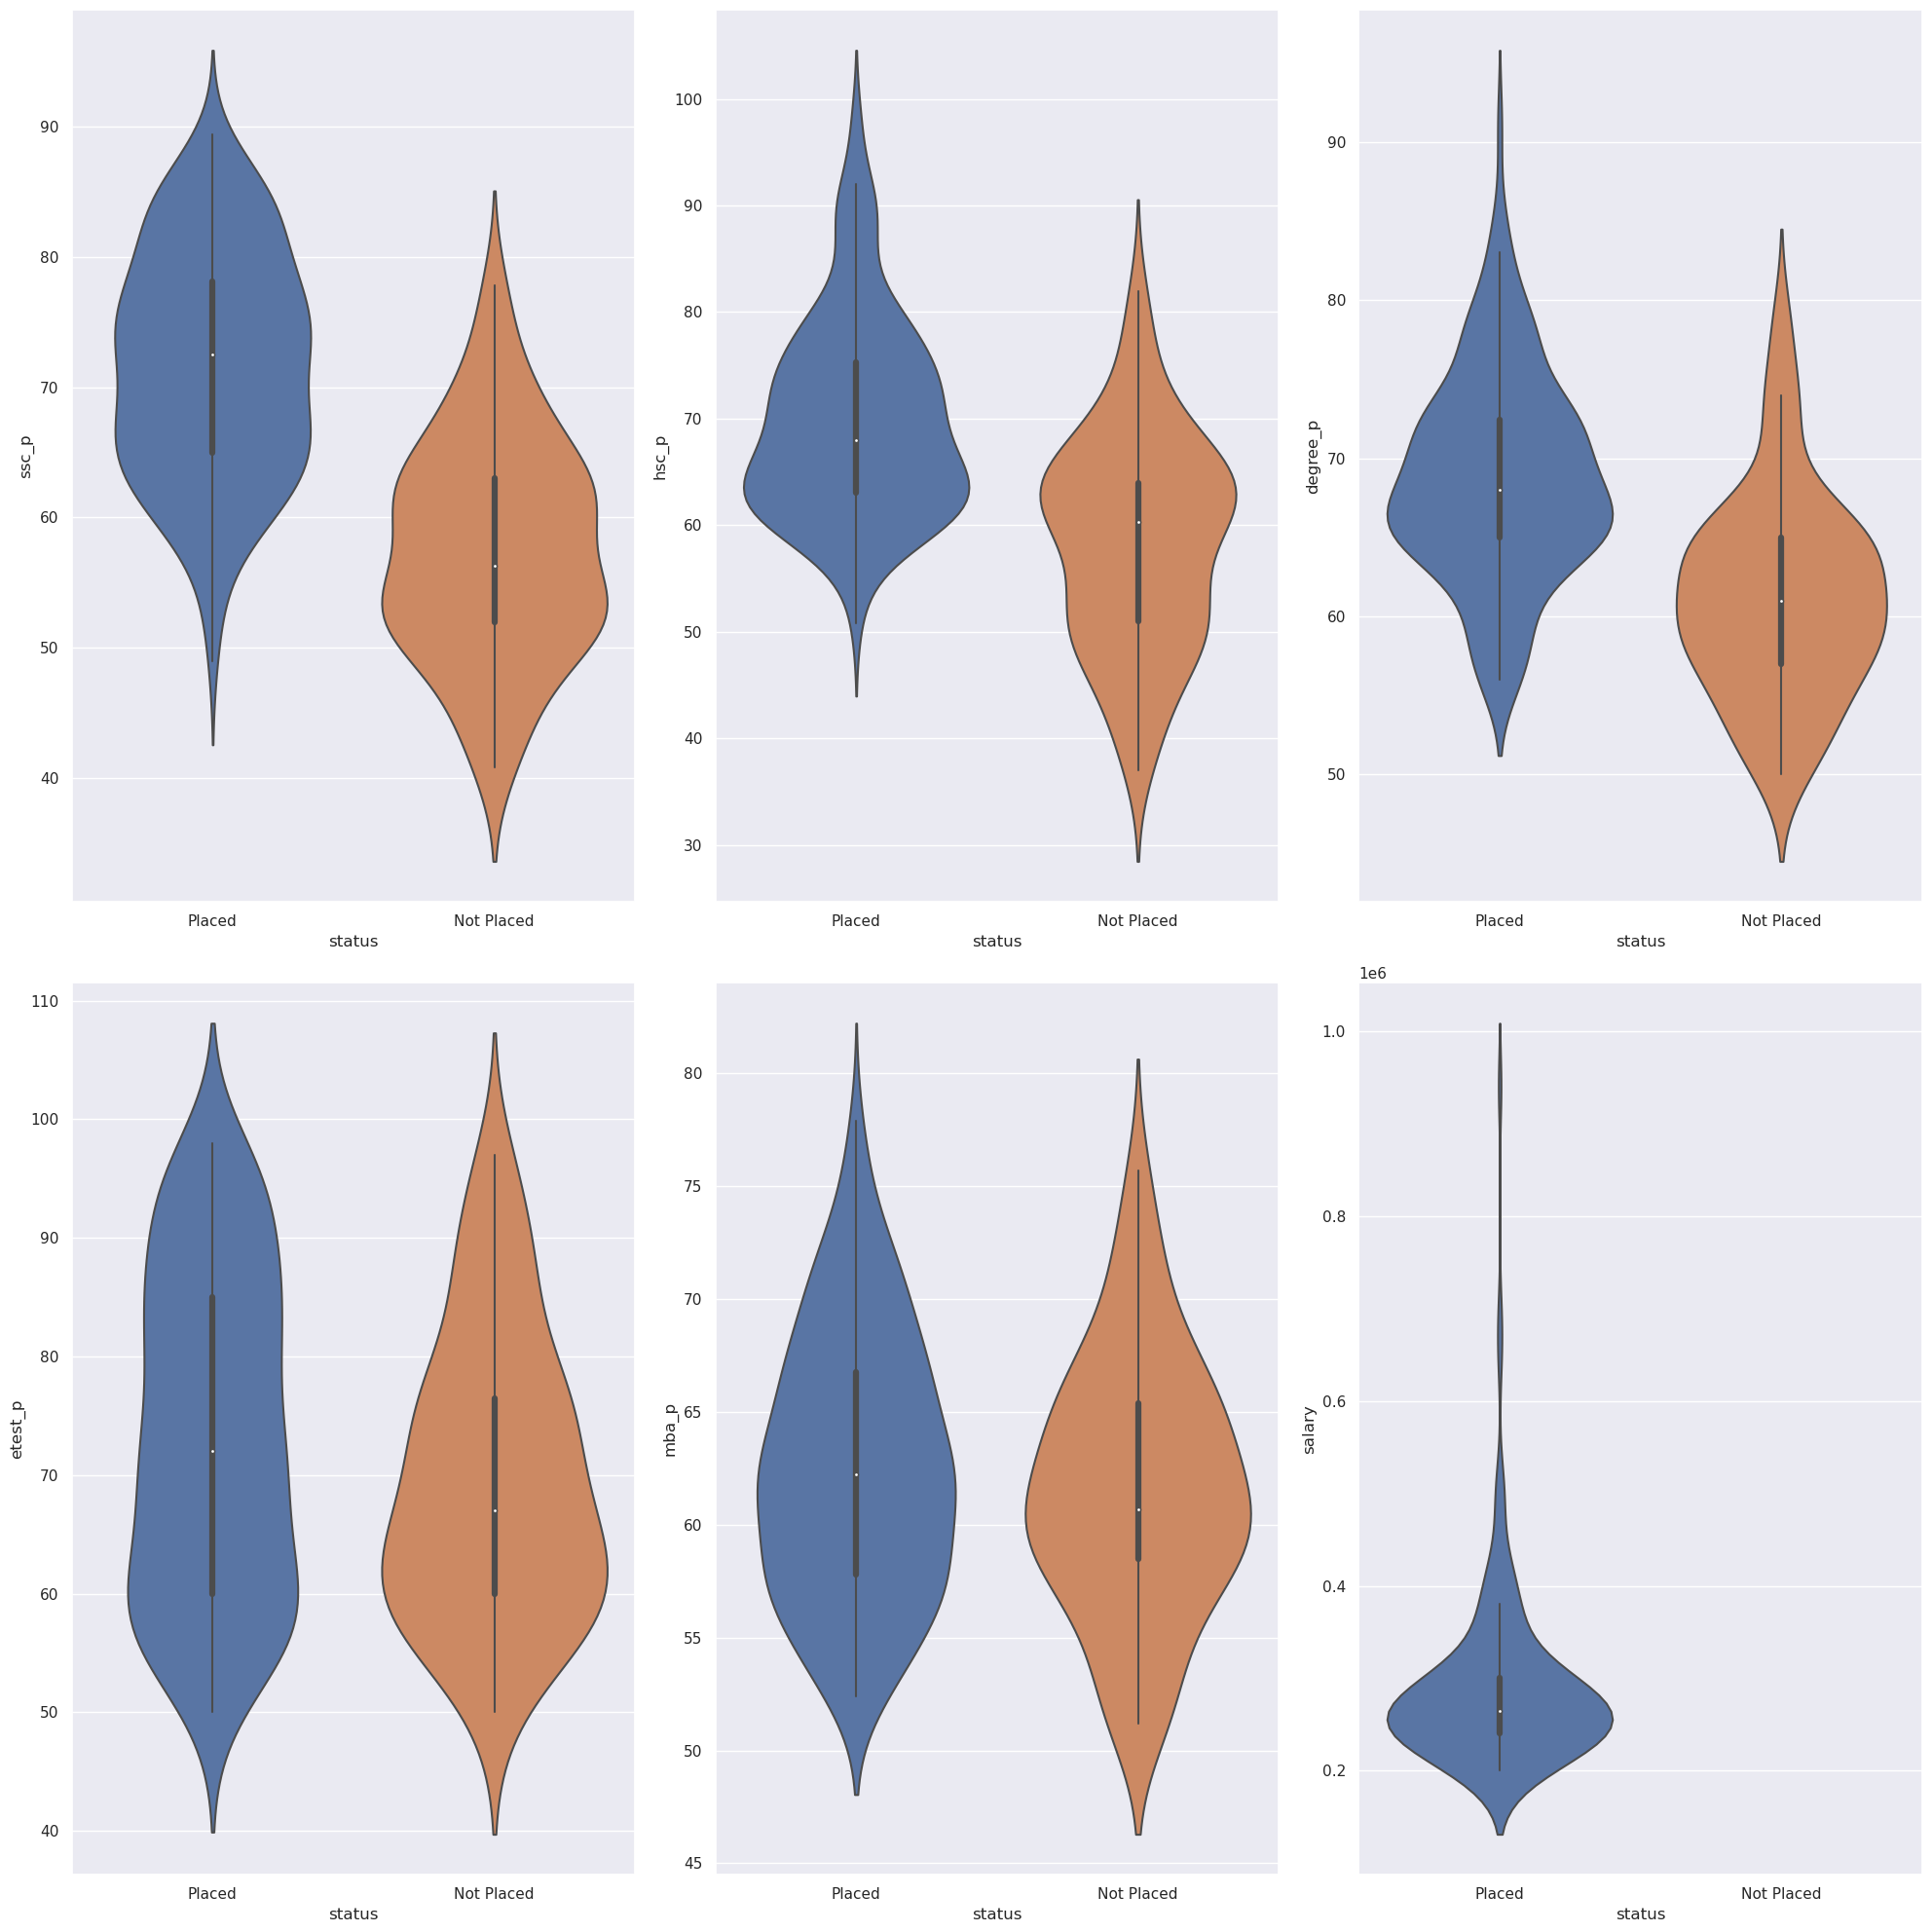

In [23]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 
            'mba_p','salary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=data, x='status', ax=axs[i])

fig.tight_layout()

plt.show()

The above features we explored were categorical, Now let's explore numerical features in the data.

In [26]:
#Check missing value
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

salary    31.162791
dtype: float64

In [27]:
# fill null value in 'salary' column with median
data['salary'] = data['salary'].fillna(data['salary'].median())
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


# Lets do LabelEncoding for the categorical variables

In [30]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {data[col].unique()}")

gender: ['M' 'F']
ssc_b: ['Others' 'Central']
hsc_b: ['Others' 'Central']
hsc_s: ['Commerce' 'Science' 'Arts']
degree_t: ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex: ['No' 'Yes']
specialisation: ['Mkt&HR' 'Mkt&Fin']
status: ['Placed' 'Not Placed']


In [31]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())
    
    # Transform the column using the encoder
    data[col] = label_encoder.transform(data[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {data[col].unique()}")

gender: [1 0]
ssc_b: [1 0]
hsc_b: [1 0]
hsc_s: [1 2 0]
degree_t: [2 0 1]
workex: [0 1]
specialisation: [1 0]
status: [1 0]


In [32]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,265000.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
Correlation Heatmap

<Axes: >

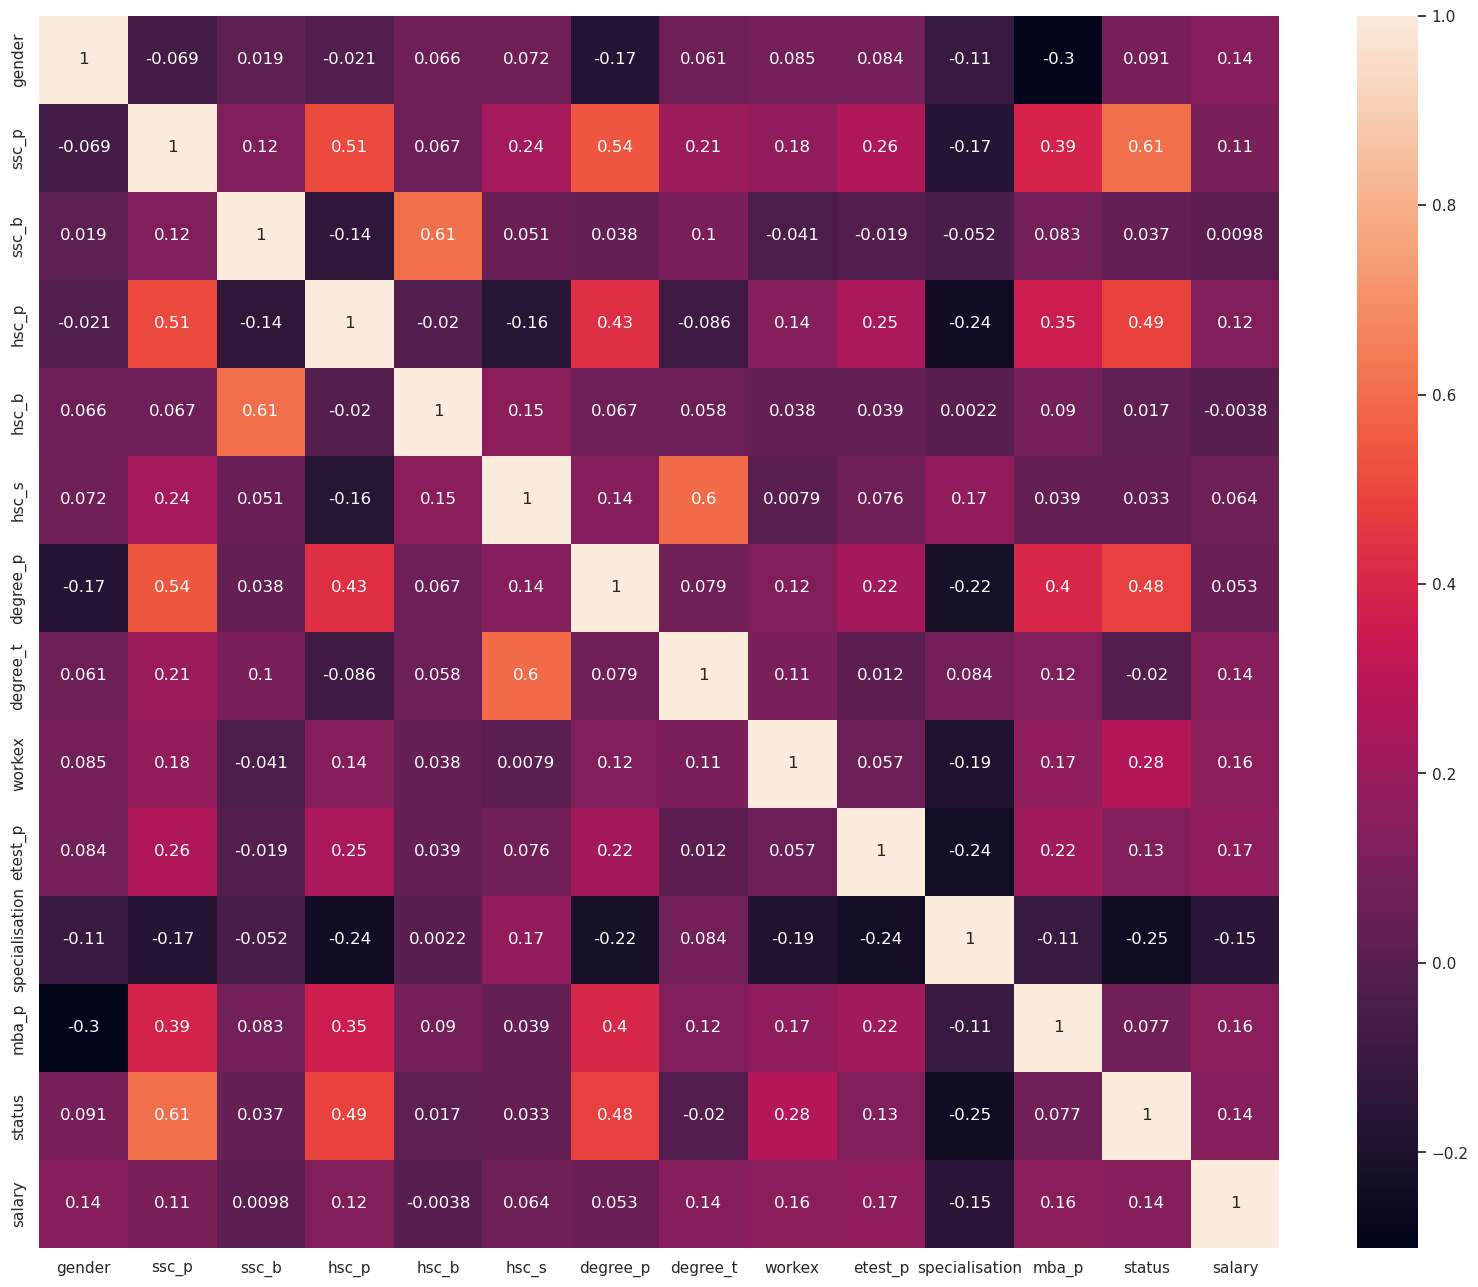

In [33]:
#Correlation Heatmap shows the correlation score each variables
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), fmt='.2g', annot=True)

# Splitting the dataset into train and test set

In [34]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = data.drop('status', axis=1)
y = data['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we will remove the outlier's from training data using Z-Score

In [35]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['hsc_p', 'degree_p', 'salary']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Random Forest 

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=5, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=0)

In [66]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 93.02 %


In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9302325581395349
Precision Score :  0.9302325581395349
Recall Score :  0.9302325581395349
Jaccard Score :  0.8695652173913043
Log Loss :  2.5146734922639875


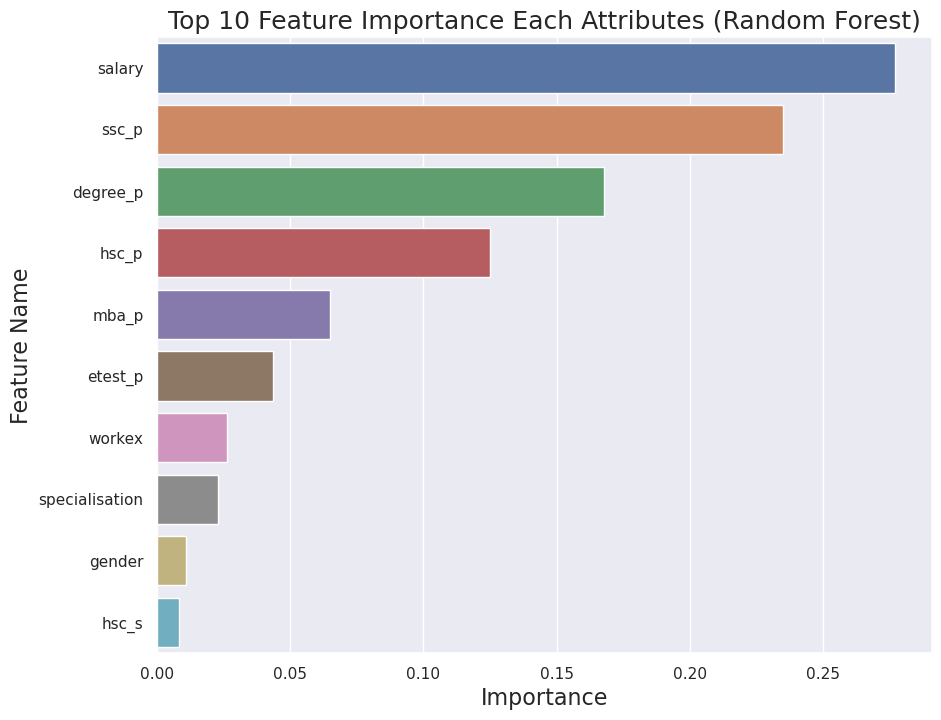

In [68]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

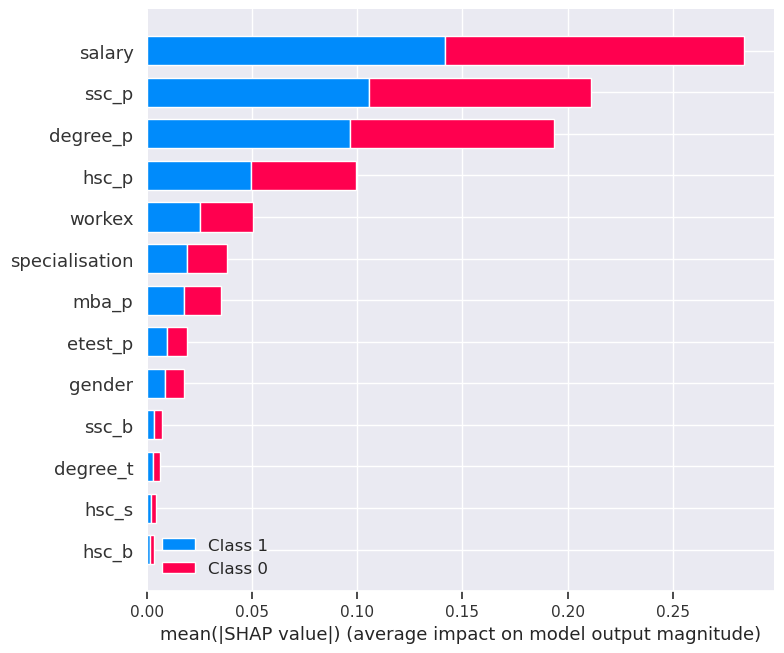

In [69]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

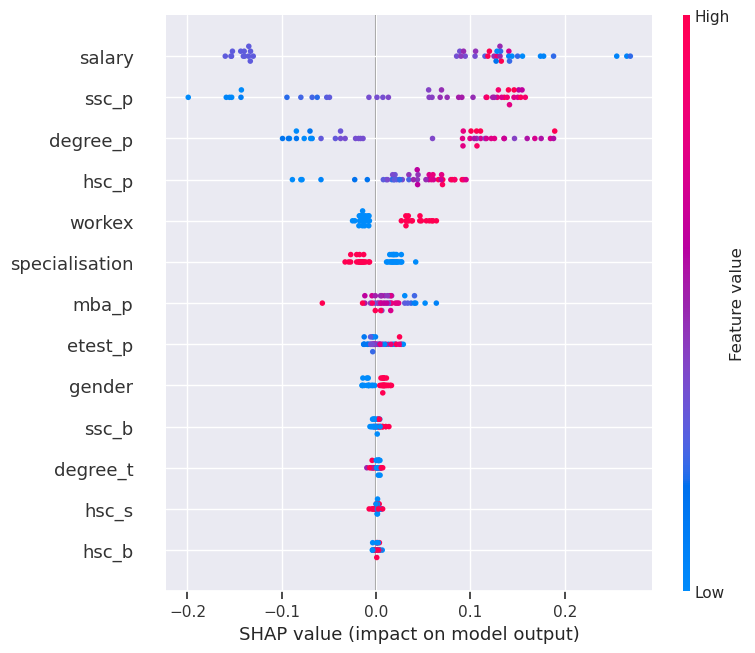

In [70]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

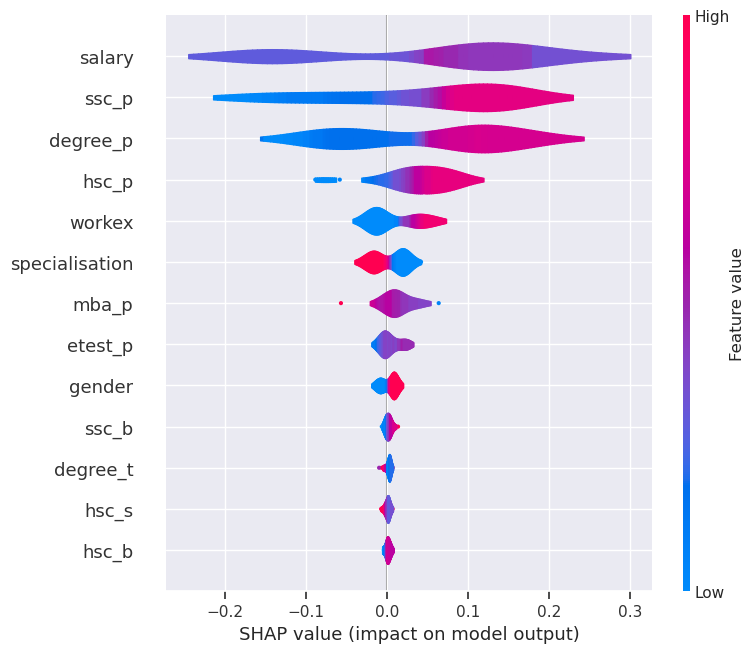

In [71]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9302325581395349')

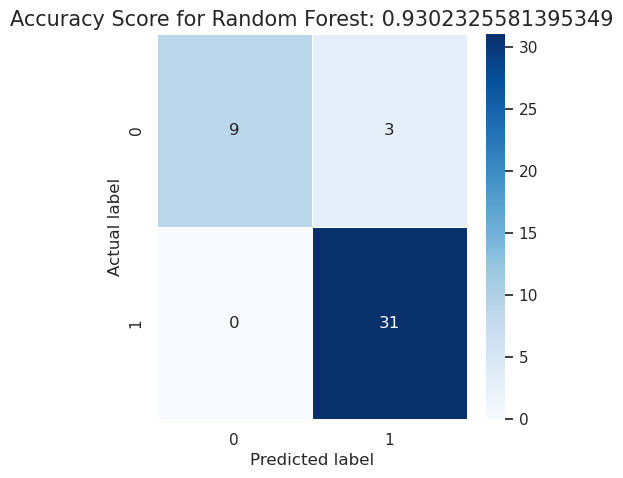

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

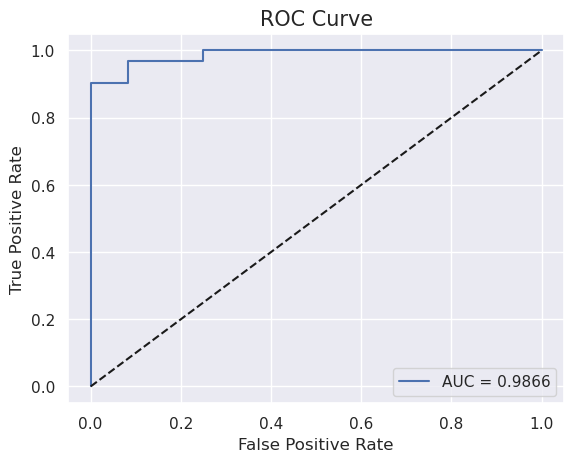

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()